In [4]:

import sys

command_str = '{sys.executable} -m pip install --upgrade xlrd'.format(sys=sys)
print(command_str)
!{command_str}

C:\Users\577342\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade xlrd


In [2]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [3]:

%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%run ../../load_magic/dataframes.py

import scraping_utils
wikipedia = scraping_utils.wikipedia

from bs4 import BeautifulSoup as bs
import networkx as nx
import re
import urllib.request

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
#pandemic_df = s.load_object('pandemic_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

%pprint
dir()

D:\Documents\Repositories\notebooks\covid19\ipynb\Unprecedented.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']
Pretty printing has been turned OFF


['Config', 'In', 'Out', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_list', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'nx', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print_all_files_ending_with', 'print_all_f

In [44]:

from datetime import date

file_path = os.path.join(s.data_folder, 'xlsx', 'unprecedented.xlsx')
unprecedented_df = pd.read_excel(file_path)
unprecedented_df.columns = ['week_date', 'relative_strength', 'possible_cause', 'week_topic']
unprecedented_df.week_date = pd.to_datetime(unprecedented_df.week_date)
unprecedented_df.week_date = unprecedented_df.week_date.map(lambda ts: date(ts.year, ts.month, ts.day))
unprecedented_df.set_index('week_date', drop=True, inplace=True)
unprecedented_df

,relative_strength,possible_cause,week_topic
week_date,,,
2015-05-03,9,NaN,NaN
2015-05-10,8,NaN,NaN
2015-05-17,8,NaN,NaN
2015-05-24,8,NaN,NaN
2015-05-31,7,NaN,NaN
...,...,...,...
2020-03-22,100,Coronavirus Pandemic,"Worldwide death toll surpasses 10,000"
2020-03-29,79,Coronavirus Pandemic,"Global cases reach 500,000"
2020-04-05,67,Oil Price War,The price falls to the lowest level since Nov...


In [45]:

mask_series = unprecedented_df.possible_cause.isnull()
unprecedented_df[~mask_series]

,relative_strength,possible_cause,week_topic
week_date,,,
2016-11-06,16,Chicago Cubs World Series,Longest championship drought in American sport...
2016-11-13,15,Donald Trump election,NaN
2016-12-11,26,Donald Trump election,NaN
2016-12-18,30,Donald Trump election,NaN
2017-01-01,23,Donald Trump election,NaN
2017-08-27,21,Hurricane Harvey,Total damage reaches $125 billion
2019-09-22,19,Hurricane Dorian,Widespread stench of rotting bodies 3 weeks later
2020-02-23,15,Stock Market Crash,NaN
2020-03-08,26,Coronavirus Pandemic,Italy places 16 million people in quarantine


In [66]:

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [16]:

import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%b')

In [92]:

mask_series = unprecedented_df.possible_cause.isnull() | unprecedented_df.week_topic.isnull()
for week_date, row_series in unprecedented_df[~mask_series].iterrows():
    print('{} (week of {}): {}'.format(row_series.possible_cause, week_date.strftime('%B %d'), row_series.week_topic))

Chicago Cubs World Series (week of November 06): Longest championship drought in American sports history
Hurricane Harvey (week of August 27): Total damage reaches $125 billion
Hurricane Dorian (week of September 22): Widespread stench of rotting bodies 3 weeks later
Coronavirus Pandemic (week of March 08): Italy places 16 million people in quarantine
Coronavirus Pandemic (week of March 15): WHO declares the outbreak a pandemic
Coronavirus Pandemic (week of March 22): Worldwide death toll surpasses 10,000
Coronavirus Pandemic (week of March 29): Global cases reach 500,000
Oil Price War (week of April 05): The price falls  to the lowest level since November 2002
Coronavirus Pandemic (week of April 12): Death toll exceeds 100,000 globally
Coronavirus Pandemic (week of April 19): Number of confirmed cases passes 2 million worldwide


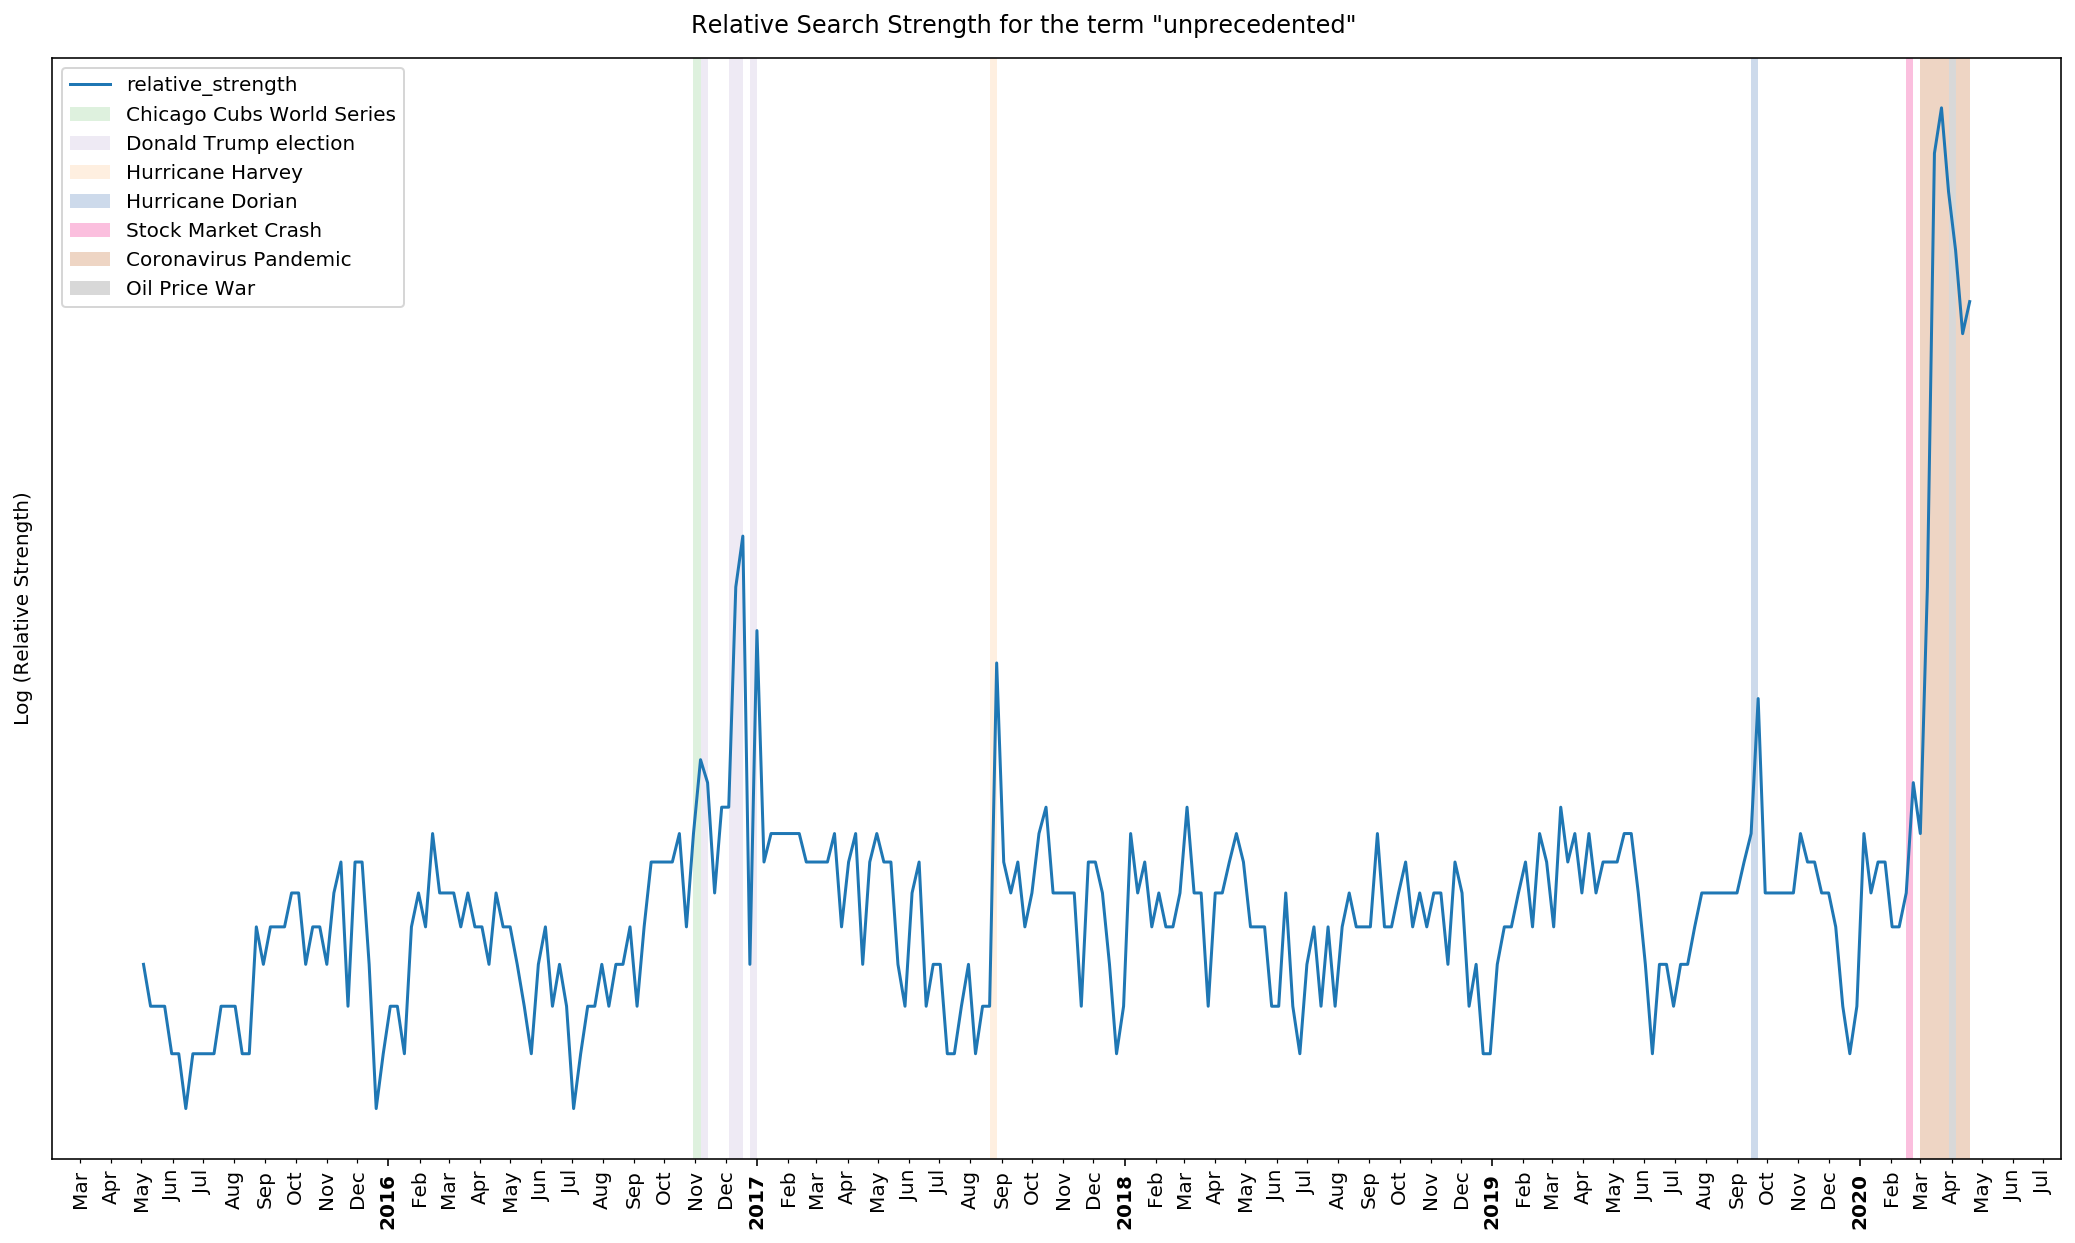

In [47]:

from datetime import timedelta
from cycler import cycler
import numpy as np

facebook_aspect_ratio = 1.91
twitter_aspect_ratio = 16/9
fig_width = 18
fig, ax = plt.subplots(figsize=(fig_width, fig_width/twitter_aspect_ratio))
ax.set_yscale('log')
AxesSubplot_obj = unprecedented_df.relative_strength.plot.line(ax=ax)
mask_series = unprecedented_df.possible_cause.isnull()
possible_cause_list = unprecedented_df[~mask_series].possible_cause.unique().tolist()

# Set color cycle
n = len(possible_cause_list)
if n < 9:
    cycler = cycler('color', plt.cm.Accent(np.linspace(0, 1, n)))
elif n < 11:
    cycler = cycler('color', plt.cm.tab10(np.linspace(0, 1, n)))
elif n < 13:
    cycler = cycler('color', plt.cm.Paired(np.linspace(0, 1, n)))
else:
    cycler = cycler('color', plt.cm.tab20(np.linspace(0, 1, n)))

for possible_cause, face_color_dict in zip(possible_cause_list, cycler()):
    face_color = face_color_dict['color']
    mask_series = (unprecedented_df.possible_cause == possible_cause)
    first_one = True
    for end_date in unprecedented_df[mask_series].index.tolist():
        start_date = end_date - timedelta(days=7)
        #print(start_date, end_date, possible_cause)
        if first_one:
            first_one = False
            ax.axvspan(start_date, end_date, facecolor=face_color, alpha=0.25, label=possible_cause)
        else:
            ax.axvspan(start_date, end_date, facecolor=face_color, alpha=0.25)
legend_obj = ax.legend()
ylabel_Text = ax.set_ylabel('Log (Relative Strength)')
ticks_list = ax.yaxis.set_ticks([])
ax.yaxis.set_ticks_position('none')
ylabel_Text = ax.set_xlabel('')
title_text = fig.suptitle('Relative Search Strength for the term "unprecedented"', x=0.5, y=0.91)

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(months_fmt)
ticklabels_list = plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ticklabels_list = plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ticklabels_list = plt.setp(ax.xaxis.get_majorticklabels(), fontweight='bold')

In [11]:

file_path = os.path.join(s.data_csv_folder, 'unprecedented.csv')
monthed_df = pd.read_csv(file_path, usecols=['Month', 'Relative Strength'],
                         parse_dates=['Month'], index_col=['Month'],
                         squeeze=True).sort_index().to_frame()
s.save_dataframes(include_index=True, monthed_df=monthed_df)

Saving to D:\Documents\Repositories\notebooks\covid19\saves\csv\monthed_df.csv


In [60]:

from datetime import date

file_path = os.path.join(s.data_folder, 'xlsx', 'monthed.xlsx')
monthed_df = pd.read_excel(file_path)
monthed_df.columns = ['month_date', 'relative_strength', 'possible_cause', 'month_topic']
monthed_df.month_date = pd.to_datetime(monthed_df.month_date)
monthed_df.month_date = monthed_df.month_date.map(lambda ts: date(ts.year, ts.month, ts.day))
monthed_df.set_index('month_date', drop=True, inplace=True)
monthed_df

,relative_strength,possible_cause,month_topic
month_date,,,
2008-01-01,4,NaN,NaN
2008-02-01,4,NaN,NaN
2008-03-01,5,NaN,NaN
2008-04-01,5,NaN,NaN
2008-05-01,6,NaN,NaN
...,...,...,...
2019-12-01,14,NaN,NaN
2020-01-01,20,Weather,large Australian bushfires that have killed as...
2020-02-01,19,NaN,NaN


In [61]:

mask_series = monthed_df.possible_cause.isnull()
monthed_df[~mask_series]

,relative_strength,possible_cause,month_topic
month_date,,,
2008-10-01,7,Global Financial Crisis,Treasury purchases failing bank assets
2009-11-01,12,European Union,European Union
2016-10-01,19,WikiLeaks,releases thousands of private emails of candid...
2016-11-01,22,Chicago Cubs,longest championship drought in American sport...
2016-12-01,31,Donald Trump,elected President
2017-01-01,25,Donald Trump,sworn in as the first president neither a poli...
2017-02-01,21,Kim Jong-un,ballistic missle test and half-brother assassi...
2017-03-01,19,SpaceX,conducts the world's first reflight of an orbi...
2017-09-01,19,Kim Jong-un,North Korea conducted its most powerful nuclea...


magma_r


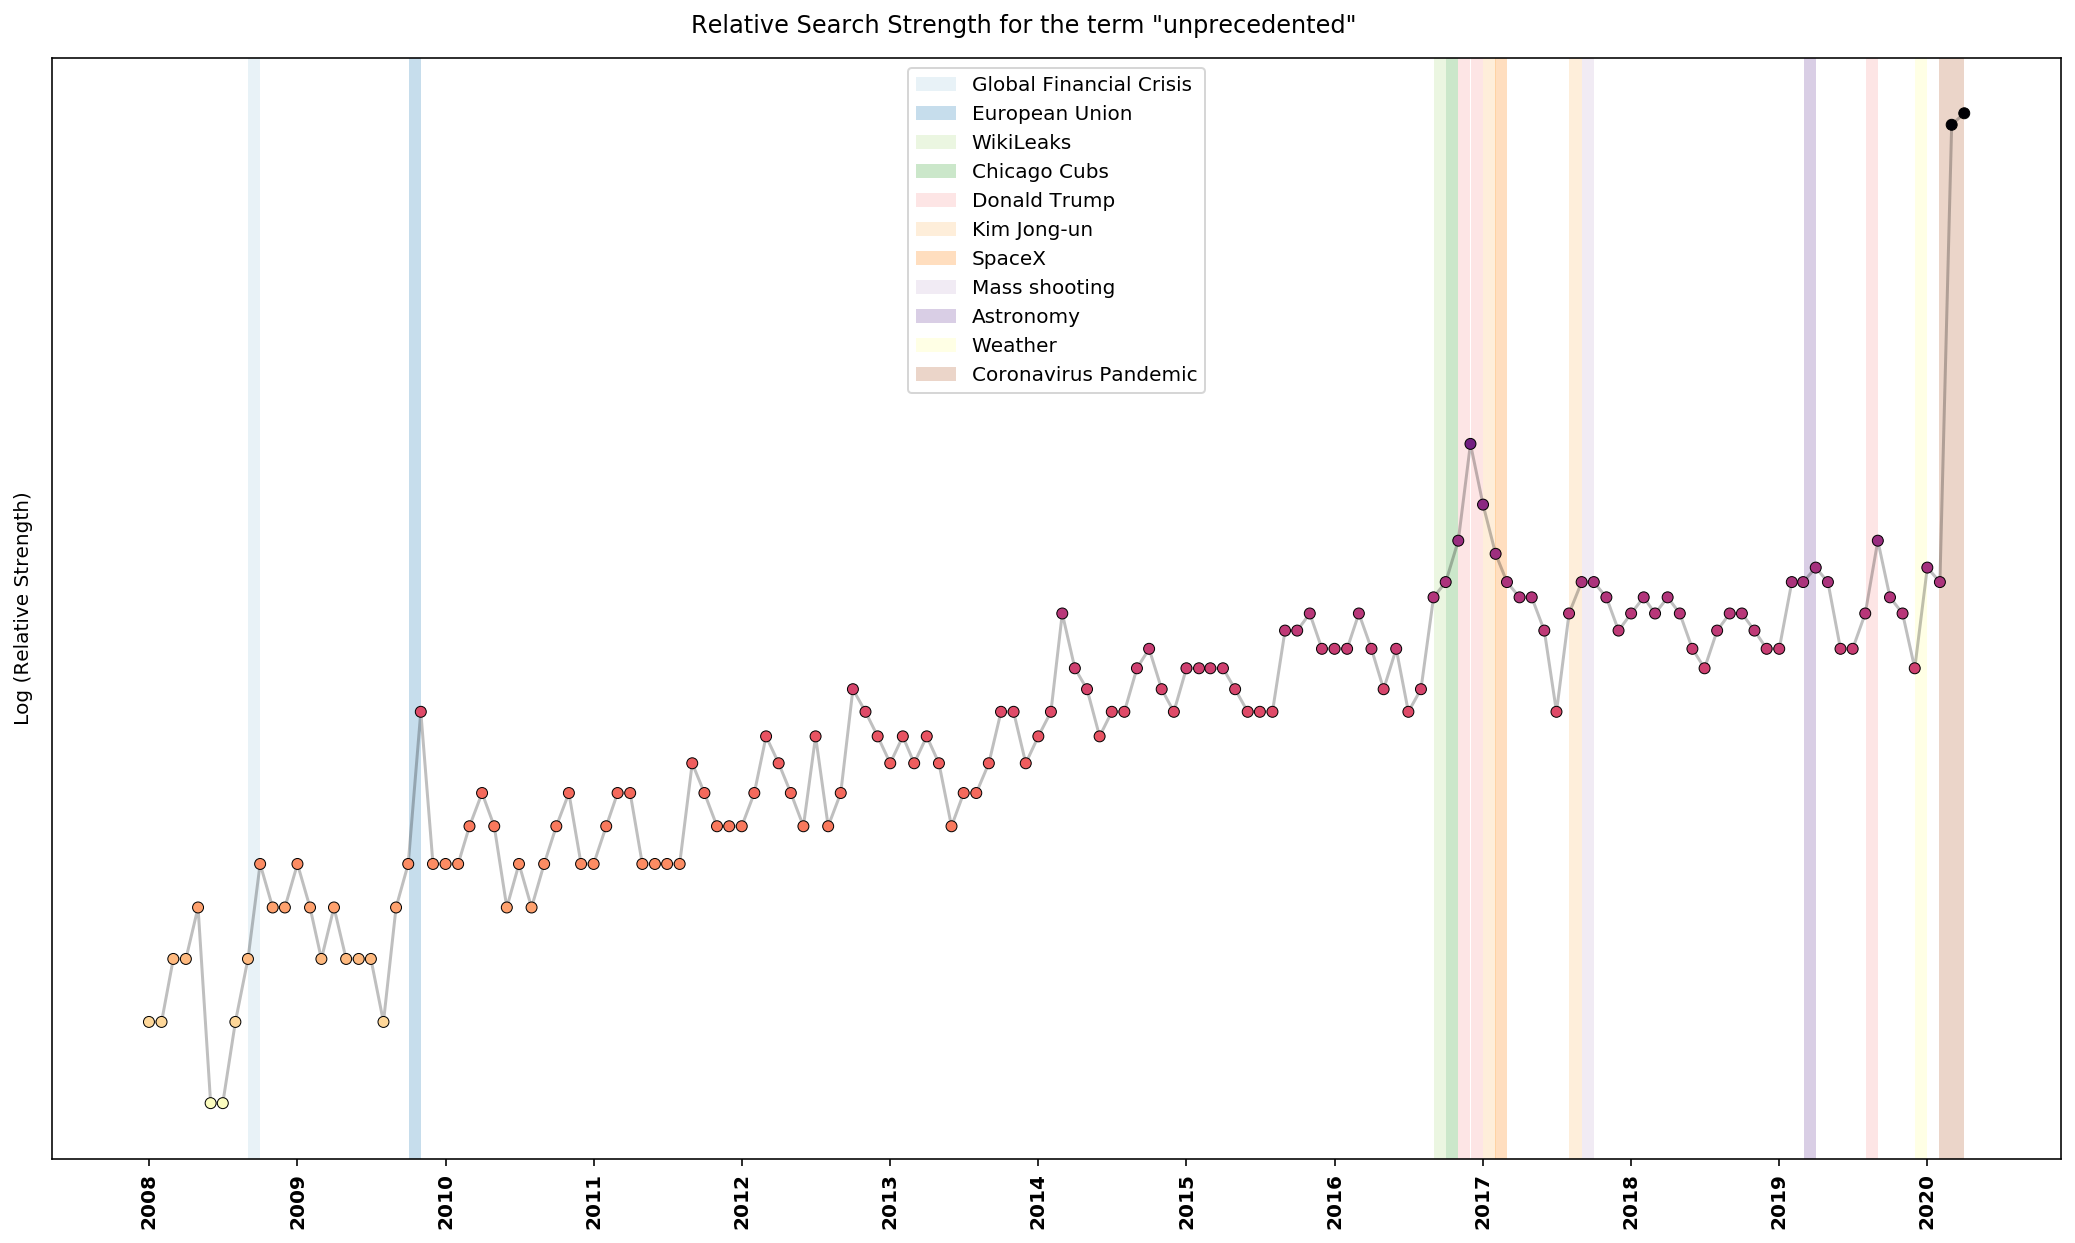

In [62]:

%run ../../load_magic/charts.py
import matplotlib as mpl
from datetime import timedelta
from matplotlib.colors import LogNorm

fig_width = 18
fig, ax = plt.subplots(figsize=(fig_width, fig_width/TWITTER_ASPECT_RATIO))
ax.set_yscale('log')

# Plot dots and line
index = monthed_df.relative_strength.index
values = monthed_df.relative_strength.values
colormap = r()
print(colormap)
cmap = mpl.cm.get_cmap(colormap)
norm = LogNorm(vmin=values.min(), vmax=values.max())
ball_and_chain(ax, index, values, c=cmap(norm(values)))

# Label the possible causes
mask_series = monthed_df.possible_cause.isnull()
possible_cause_list = monthed_df[~mask_series].possible_cause.unique().tolist()

# Get color cycler
color_cycler = get_color_cycler(len(possible_cause_list))

for possible_cause, face_color_dict in zip(possible_cause_list, color_cycler()):
    face_color = face_color_dict['color']
    mask_series = (monthed_df.possible_cause == possible_cause)
    first_one = True
    for end_date in monthed_df[mask_series].index.tolist():
        start_date = end_date - timedelta(days=30)
        if first_one:
            first_one = False
            label = possible_cause
        else:
            label = None
        ax.axvspan(start_date, end_date, facecolor=face_color, alpha=0.25, label=label)

legend_obj = ax.legend()
ylabel_Text = ax.set_ylabel('Log (Relative Strength)')
ticks_list = ax.yaxis.set_ticks([])
ax.yaxis.set_ticks_position('none')
ylabel_Text = ax.set_xlabel('')
title_text = fig.suptitle('Relative Search Strength for the term "unprecedented"', x=0.5, y=0.91)

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ticklabels_list = plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ticklabels_list = plt.setp(ax.xaxis.get_majorticklabels(), fontweight='bold')

#save_fig_as_various(fig, 'relative_search_strength_of_unprecedented', verbose=True)